#**Importing the Dataset**





In [1]:
from google.colab import files
uploaded=files.upload()

Saving Real_Estate.csv to Real_Estate.csv


#**Importing the required libraries**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Loading the dataset**


In [3]:
df=pd.read_csv('Real_Estate.csv')

In [4]:
df.head()

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,2012-09-02 16:42:30.519336,13.3,4082.0150,8,25.007059,121.561694,6.488673
1,2012-09-04 22:52:29.919544,35.5,274.0144,2,25.012148,121.546990,24.970725
2,2012-09-05 01:10:52.349449,1.1,1978.6710,10,25.003850,121.528336,26.694267
3,2012-09-05 13:26:01.189083,22.2,1055.0670,5,24.962887,121.482178,38.091638
4,2012-09-06 08:29:47.910523,8.5,967.4000,6,25.011037,121.479946,21.654710


**Let's check the datatypes of the features**


In [8]:
df.dtypes

,0
Transaction date,object
House age,float64
Distance to the nearest MRT station,float64
Number of convenience stores,int64
Latitude,float64
Longitude,float64
House price of unit area,float64


So as per the datatypes only Transaction date is of object type and the remaining others are either float or int datatype so don't need to convert them into any numeric datatypes


**Checking for null and duplicates**

In [17]:
null_vals=df.isnull().sum().sum()
print(f'null values={null_vals}')
dup=df.duplicated().sum()
print(f'Duplicate values={dup}')

null values=0
Duplicate values=0


Here there is no null values and duplicate values

In [34]:
df.shape

(414, 6)

**In this prediction there is no need of Transaction date	so i will drop that column**


In [22]:
df.drop(columns='Transaction date',axis=1,inplace=True)

**Here i will check for the correlation of each feature with the target column(House price of unit area) using correlarion matrix**

In [35]:
df.head()

,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,13.3,4082.0150,8,25.007059,121.561694,6.488673
1,35.5,274.0144,2,25.012148,121.546990,24.970725
2,1.1,1978.6710,10,25.003850,121.528336,26.694267
3,22.2,1055.0670,5,24.962887,121.482178,38.091638
4,8.5,967.4000,6,25.011037,121.479946,21.654710


In [39]:
df[(df['Distance to the nearest MRT station']>1000) & (df['Number of convenience stores']>8)]

,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
2,1.1,1978.671,10,25.003850,121.528336,26.694267
25,16.1,3771.895,9,24.970786,121.545295,0.000000
35,9.9,4510.359,10,24.982211,121.549057,1.102852
71,12.0,2408.993,9,24.932844,121.551066,25.696463
76,25.9,1931.207,9,25.012740,121.501104,38.012994
88,33.0,4449.270,9,25.006421,121.543213,3.957365
101,17.3,4066.587,9,24.948275,121.533122,25.589711
157,31.0,3171.329,9,25.012370,121.545902,3.398305
229,4.7,4066.587,9,24.952434,121.495369,0.000000
230,8.9,1487.868,9,24.987745,121.512572,43.574531


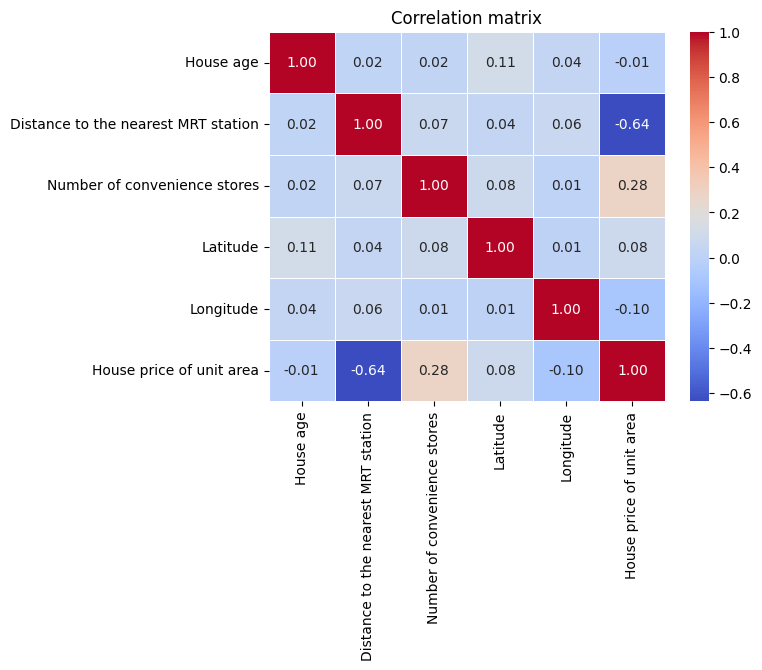

In [30]:
corr_matrix=df.corr()
sns.heatmap(corr_matrix,cmap='coolwarm',fmt='.2f',linewidths=0.5,annot=True)
plt.title('Correlation matrix')
plt.show()

**Things understood from Correlation matrix are :-**

1.House age : Shows weak negative correlation with House price. This indicates that it is not strong predictor of House price

2.Latitude & Longitude : Latitude shows slight postive correlation and Longitude shows slightly negative correlation both have weak correlation with house price

3.MRT station and Convenience store : The MRT station is having strong negative correlation and Conveniece store is having Positive correlation. So this indicates that houses near to MRT station and many number of convenience store has higher prices



**Importing libraries required for model building**

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,root_mean_squared_error

**Model Building**

In [42]:
df.head()

,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,13.3,4082.0150,8,25.007059,121.561694,6.488673
1,35.5,274.0144,2,25.012148,121.546990,24.970725
2,1.1,1978.6710,10,25.003850,121.528336,26.694267
3,22.2,1055.0670,5,24.962887,121.482178,38.091638
4,8.5,967.4000,6,25.011037,121.479946,21.654710


In [63]:
model=LinearRegression()

X=df[['Distance to the nearest MRT station', 'Number of convenience stores', 'Latitude', 'Longitude']]
y=df['House price of unit area']
#Spliting the data for training and testing
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=23)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

**Plotting the graph of prediction done by the model**

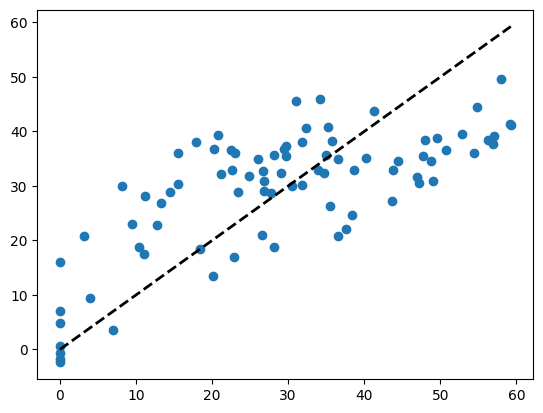

In [64]:
plt.scatter(y_test,y_pred)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'k--',lw=2)
plt.show()